<a href="https://colab.research.google.com/github/Duvobadeli35/EDA_Assignment/blob/main/Exploratoy_Data_Analysis_Muhammad_David_Ubaidillah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #data manipulating & data analysis
import matplotlib.pyplot as plt #data visualization
import seaborn as sns # data visualization
import numpy as np
from scipy import stats

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', '{:.2f}'.format)
import zipfile

In [ ]:
!kaggle datasets download -d shudhanshusingh/az-medicine-dataset-of-india

with zipfile.ZipFile('az-medicine-dataset-of-india.zip', 'r') as zip_ref:
    zip_ref.extractall('az_medicine_data')

df = pd.read_csv('az_medicine_data/A_Z_medicines_dataset_of_India.csv')

Dataset URL: https://www.kaggle.com/datasets/shudhanshusingh/az-medicine-dataset-of-india
License(s): CC-BY-SA-4.0
 61% 4.00M/6.60M [00:01<00:00, 5.27MB/s]
100% 6.60M/6.60M [00:01<00:00, 5.83MB/s]


In [ ]:
df

id                           name  price(₹)  Is_discontinued  \
0            1       Augmentin 625 Duo Tablet    223.42            False   
1            2            Azithral 500 Tablet    132.36            False   
2            3               Ascoril LS Syrup    118.00            False   
3            4           Allegra 120mg Tablet    218.81            False   
4            5                 Avil 25 Tablet     10.96            False   
...        ...                            ...       ...              ...   
253968  253969  Ziyapod 100mg Oral Suspension     62.30            False   
253969  253970            Zemhart 30mg Tablet     54.00            False   
253970  253971              Zivex 25mg Tablet     57.00            False   
253971  253972        ZI Fast 500mg Injection    152.00            False   
253972  253973      Zyvocol 1% Dusting Powder    110.00            False   

                            manufacturer_name       type  \
0        Glaxo SmithKline Pharmaceuticals Ltd  allopathy   
1                 Alembic Pharmaceuticals Ltd  allopathy   
2                Glenmark Pharmaceuticals Ltd  allopathy   
3                           Sanofi India  Ltd  allopathy   
4                           Sanofi India  Ltd  allopathy   
...                                       ...        ...   
253968            Ziyana Lifesciences Pvt Ltd  allopathy   
253969                 Leeford Healthcare Ltd  allopathy   
253970                          Euro Organics  allopathy   
253971  Burgeon Health Series Private Limited  allopathy   
253972                         GBK Healthcare  allopathy   

                        pack_size_label            short_composition1  \
0                   strip of 10 tablets         Amoxycillin  (500mg)    
1                    strip of 5 tablets          Azithromycin (500mg)   
2                bottle of 100 ml Syrup          Ambroxol (30mg/5ml)    
3                   strip of 10 tablets          Fexofenadine (120mg)   
4                   strip of 15 tablets            Pheniramine (25mg)   
...                                 ...                           ...   
253968  bottle of 30 ml Oral Suspension  Cefpodoxime Proxetil (100mg)   
253969              strip of 10 tablets              Diltiazem (30mg)   
253970              strip of 10 tablets            Hydroxyzine (25mg)   
253971              vial of 1 Injection          Azithromycin (500mg)   
253972   bottle of 75 gm Dusting Powder         Clotrimazole (1% w/w)   

                short_composition2  
0          Clavulanic Acid (125mg)  
1                              NaN  
2        Levosalbutamol (1mg/5ml)   
3                              NaN  
4                              NaN  
...                            ...  
253968                         NaN  
253969                         NaN  
253970                         NaN  
253971                         NaN  
253972                         NaN  

[253973 rows x 9 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  253973 non-null  int64  
 1   name                253973 non-null  object 
 2   price(₹)            253973 non-null  float64
 3   Is_discontinued     253973 non-null  bool   
 4   manufacturer_name   253973 non-null  object 
 5   type                253973 non-null  object 
 6   pack_size_label     253973 non-null  object 
 7   short_composition1  253973 non-null  object 
 8   short_composition2  112171 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 15.7+ MB


In [ ]:
# Unique values
print('Unique Values per column:')
for i in df.columns:
    print(f'{i} → {df[i].nunique()}')

Unique Values per column:
id → 253973
name → 249398
price(₹) → 20664
Is_discontinued → 2
manufacturer_name → 7648
type → 1
pack_size_label → 1929
short_composition1 → 8523
short_composition2 → 2980


In [ ]:
# Checking Null
print('Checking Null')
df.isnull().sum()

Checking Null


id                         0
name                       0
price(₹)                   0
Is_discontinued            0
manufacturer_name          0
type                       0
pack_size_label            0
short_composition1         0
short_composition2    141802
dtype: int64

In [ ]:
# Dropping unncecessary columns

# 'type' column has only 1 value and will not have an effect on the final model
df=df.drop(columns=['type'])

# Discontinued medicines and the column must be dropped as the model needs to be frictionless
# 'id' can also be dropped
df = df[df.Is_discontinued==False]
df=df.drop(columns=['Is_discontinued','id'])

In [ ]:
df

name  price(₹)  \
0            Augmentin 625 Duo Tablet    223.42   
1                 Azithral 500 Tablet    132.36   
2                    Ascoril LS Syrup    118.00   
3                Allegra 120mg Tablet    218.81   
4                      Avil 25 Tablet     10.96   
...                               ...       ...   
253968  Ziyapod 100mg Oral Suspension     62.30   
253969            Zemhart 30mg Tablet     54.00   
253970              Zivex 25mg Tablet     57.00   
253971        ZI Fast 500mg Injection    152.00   
253972      Zyvocol 1% Dusting Powder    110.00   

                            manufacturer_name  \
0        Glaxo SmithKline Pharmaceuticals Ltd   
1                 Alembic Pharmaceuticals Ltd   
2                Glenmark Pharmaceuticals Ltd   
3                           Sanofi India  Ltd   
4                           Sanofi India  Ltd   
...                                       ...   
253968            Ziyana Lifesciences Pvt Ltd   
253969                 Leeford Healthcare Ltd   
253970                          Euro Organics   
253971  Burgeon Health Series Private Limited   
253972                         GBK Healthcare   

                        pack_size_label            short_composition1  \
0                   strip of 10 tablets         Amoxycillin  (500mg)    
1                    strip of 5 tablets          Azithromycin (500mg)   
2                bottle of 100 ml Syrup          Ambroxol (30mg/5ml)    
3                   strip of 10 tablets          Fexofenadine (120mg)   
4                   strip of 15 tablets            Pheniramine (25mg)   
...                                 ...                           ...   
253968  bottle of 30 ml Oral Suspension  Cefpodoxime Proxetil (100mg)   
253969              strip of 10 tablets              Diltiazem (30mg)   
253970              strip of 10 tablets            Hydroxyzine (25mg)   
253971              vial of 1 Injection          Azithromycin (500mg)   
253972   bottle of 75 gm Dusting Powder         Clotrimazole (1% w/w)   

                short_composition2  
0          Clavulanic Acid (125mg)  
1                              NaN  
2        Levosalbutamol (1mg/5ml)   
3                              NaN  
4                              NaN  
...                            ...  
253968                         NaN  
253969                         NaN  
253970                         NaN  
253971                         NaN  
253972                         NaN  

[246068 rows x 6 columns]

In [ ]:
# Exploring the 'pack_size_label' column
form=[]
count={}
for i in df.pack_size_label:
    words=i.split()
    x=words[-1].lower()
    if len(x)<=2:
        x=words[-2].lower()
    if x in form:
        count[x]+=1
    else:
        count[x]=1
        form.append(x)

sorted_count = dict(sorted(count.items(), key=lambda x:x[1], reverse=True))
print(sorted_count)

{'tablets': 129641, 'injection': 30931, 'tablet': 18270, 'syrup': 16409, 'capsules': 15236, 'suspension': 9011, 'capsule': 6202, 'cream': 4863, 'drop': 3697, 'solution': 1625, 'gel': 1580, 'ointment': 1574, 'drops': 1388, 'lotion': 989, 'infusion': 836, 'soap': 515, 'powder': 344, 'spray': 331, 'expectorant': 321, 'shampoo': 261, 'kit': 229, 'inhaler': 211, 'wash': 193, 'liquid': 140, 'injections': 126, 'granules': 115, 'respules': 111, 'suppositories': 70, 'rotacaps': 51, 'sachet': 51, 'gargle': 51, 'patches': 47, 'strips': 37, 'suppository': 32, 'paint': 32, 'inhalation': 28, 'syringe': 27, 'strip': 25, 'respicaps': 24, 'transcaps': 23, 'emulsion': 22, 'lozenges': 21, 'linctus': 19, 'pessaries': 18, 'transhaler': 18, 'paste': 17, 'combikit': 17, 'bottles': 16, 'toothpaste': 16, 'patch': 16, 'suspensions': 12, 'gums': 12, 'transpules': 11, 'combipack': 9, 'scrub': 9, 'solutions': 9, 'serum': 9, 'jelly': 8, 'lacquer': 7, 'tabcaps': 7, 'sachets': 7, 'enema': 7, 'syrups': 6, 'husk': 6, '

In [ ]:
# Fix: removing the plural issue (eg: tablet | tablets)
final_count=sorted_count.copy()
for key,value in sorted_count.items():
    test=(key+'s') in final_count
    if test:
        final_count[key]+=final_count[key+'s']
        del final_count[key+'s']
        form.remove(key+'s')

final_count = dict(sorted(final_count.items(), key=lambda x:x[1], reverse=True))
print(final_count)

{'tablet': 147911, 'injection': 31057, 'capsule': 21438, 'syrup': 16415, 'suspension': 9023, 'drop': 5085, 'cream': 4867, 'solution': 1634, 'gel': 1581, 'ointment': 1574, 'lotion': 990, 'infusion': 837, 'soap': 515, 'powder': 344, 'spray': 331, 'expectorant': 321, 'shampoo': 262, 'kit': 229, 'inhaler': 211, 'wash': 193, 'liquid': 140, 'granules': 115, 'respules': 111, 'suppositories': 70, 'strip': 62, 'sachet': 58, 'rotacaps': 51, 'gargle': 51, 'patches': 47, 'suppository': 32, 'paint': 32, 'inhalation': 28, 'syringe': 27, 'respicaps': 24, 'transcaps': 23, 'emulsion': 23, 'lozenges': 21, 'linctus': 19, 'pessaries': 18, 'transhaler': 18, 'paste': 17, 'combikit': 17, 'bottle': 17, 'toothpaste': 16, 'patch': 16, 'gum': 14, 'transpules': 11, 'combipack': 9, 'scrub': 9, 'serum': 9, 'jelly': 8, 'lacquer': 7, 'tabcaps': 7, 'enema': 7, 'husk': 6, 'liniment': 6, 'cartriges': 6, 'caplets': 5, 'redicaps': 5, 'instacap': 5, 'pastilles': 4, 'foam': 4, 'nexcaps': 4, 'pellets': 4, 'pouch': 4, 'elixir

In [ ]:
def getType(row):
    for type in form:
        if type in row['pack_size_label'].lower():
            return type
def getComp(row):
    return row['short_composition1'].split('(')[0].lower().rstrip()

def getValue(row):
    return row['short_composition1'].split('(')[1].lower().rstrip().rstrip(')')


df['type'] = df.apply(lambda row: getType(row), axis=1)
df['primary_comp'] = df.apply(lambda row: getComp(row), axis=1)
df['entire_comp'] =  df['primary_comp'] + ' ' + np.where(df['short_composition2'].isna(), '',
                                                         df['short_composition2'].astype(str).apply(lambda x: x.split('(')[0].lower().rstrip()))
df['value'] = df.apply(lambda row: getValue(row), axis=1)
df['entire_value'] =  df['value'] + ' ' + np.where(df['short_composition2'].isna(), '',
                                                   df['short_composition2'].astype(str).apply(lambda x: x.split('(')[1].lower().rstrip().rstrip(')') if len(x.split('(')) > 1 else ''))

In [ ]:
df

name  price(₹)  \
0            Augmentin 625 Duo Tablet    223.42   
1                 Azithral 500 Tablet    132.36   
2                    Ascoril LS Syrup    118.00   
3                Allegra 120mg Tablet    218.81   
4                      Avil 25 Tablet     10.96   
...                               ...       ...   
253968  Ziyapod 100mg Oral Suspension     62.30   
253969            Zemhart 30mg Tablet     54.00   
253970              Zivex 25mg Tablet     57.00   
253971        ZI Fast 500mg Injection    152.00   
253972      Zyvocol 1% Dusting Powder    110.00   

                            manufacturer_name  \
0        Glaxo SmithKline Pharmaceuticals Ltd   
1                 Alembic Pharmaceuticals Ltd   
2                Glenmark Pharmaceuticals Ltd   
3                           Sanofi India  Ltd   
4                           Sanofi India  Ltd   
...                                       ...   
253968            Ziyana Lifesciences Pvt Ltd   
253969                 Leeford Healthcare Ltd   
253970                          Euro Organics   
253971  Burgeon Health Series Private Limited   
253972                         GBK Healthcare   

                        pack_size_label            short_composition1  \
0                   strip of 10 tablets         Amoxycillin  (500mg)    
1                    strip of 5 tablets          Azithromycin (500mg)   
2                bottle of 100 ml Syrup          Ambroxol (30mg/5ml)    
3                   strip of 10 tablets          Fexofenadine (120mg)   
4                   strip of 15 tablets            Pheniramine (25mg)   
...                                 ...                           ...   
253968  bottle of 30 ml Oral Suspension  Cefpodoxime Proxetil (100mg)   
253969              strip of 10 tablets              Diltiazem (30mg)   
253970              strip of 10 tablets            Hydroxyzine (25mg)   
253971              vial of 1 Injection          Azithromycin (500mg)   
253972   bottle of 75 gm Dusting Powder         Clotrimazole (1% w/w)   

                short_composition2        type          primary_comp  \
0          Clavulanic Acid (125mg)      tablet           amoxycillin   
1                              NaN      tablet          azithromycin   
2        Levosalbutamol (1mg/5ml)        syrup              ambroxol   
3                              NaN      tablet          fexofenadine   
4                              NaN      tablet           pheniramine   
...                            ...         ...                   ...   
253968                         NaN  suspension  cefpodoxime proxetil   
253969                         NaN      tablet             diltiazem   
253970                         NaN      tablet           hydroxyzine   
253971                         NaN   injection          azithromycin   
253972                         NaN      powder          clotrimazole   

                          entire_comp     value      entire_value  
0       amoxycillin   clavulanic acid     500mg       500mg 125mg  
1                       azithromycin      500mg            500mg   
2            ambroxol  levosalbutamol  30mg/5ml  30mg/5ml 1mg/5ml  
3                       fexofenadine      120mg            120mg   
4                        pheniramine       25mg             25mg   
...                               ...       ...               ...  
253968          cefpodoxime proxetil      100mg            100mg   
253969                     diltiazem       30mg             30mg   
253970                   hydroxyzine       25mg             25mg   
253971                  azithromycin      500mg            500mg   
253972                  clotrimazole     1% w/w           1% w/w   

[246068 rows x 11 columns]

In [ ]:
# Drop redundant columns
dataset = df.drop(columns=['pack_size_label','short_composition1','short_composition2'])

In [ ]:
df

name  price(₹)  \
0            Augmentin 625 Duo Tablet    223.42   
1                 Azithral 500 Tablet    132.36   
2                    Ascoril LS Syrup    118.00   
3                Allegra 120mg Tablet    218.81   
4                      Avil 25 Tablet     10.96   
...                               ...       ...   
253968  Ziyapod 100mg Oral Suspension     62.30   
253969            Zemhart 30mg Tablet     54.00   
253970              Zivex 25mg Tablet     57.00   
253971        ZI Fast 500mg Injection    152.00   
253972      Zyvocol 1% Dusting Powder    110.00   

                            manufacturer_name  \
0        Glaxo SmithKline Pharmaceuticals Ltd   
1                 Alembic Pharmaceuticals Ltd   
2                Glenmark Pharmaceuticals Ltd   
3                           Sanofi India  Ltd   
4                           Sanofi India  Ltd   
...                                       ...   
253968            Ziyana Lifesciences Pvt Ltd   
253969                 Leeford Healthcare Ltd   
253970                          Euro Organics   
253971  Burgeon Health Series Private Limited   
253972                         GBK Healthcare   

                        pack_size_label            short_composition1  \
0                   strip of 10 tablets         Amoxycillin  (500mg)    
1                    strip of 5 tablets          Azithromycin (500mg)   
2                bottle of 100 ml Syrup          Ambroxol (30mg/5ml)    
3                   strip of 10 tablets          Fexofenadine (120mg)   
4                   strip of 15 tablets            Pheniramine (25mg)   
...                                 ...                           ...   
253968  bottle of 30 ml Oral Suspension  Cefpodoxime Proxetil (100mg)   
253969              strip of 10 tablets              Diltiazem (30mg)   
253970              strip of 10 tablets            Hydroxyzine (25mg)   
253971              vial of 1 Injection          Azithromycin (500mg)   
253972   bottle of 75 gm Dusting Powder         Clotrimazole (1% w/w)   

                short_composition2        type          primary_comp  \
0          Clavulanic Acid (125mg)      tablet           amoxycillin   
1                              NaN      tablet          azithromycin   
2        Levosalbutamol (1mg/5ml)        syrup              ambroxol   
3                              NaN      tablet          fexofenadine   
4                              NaN      tablet           pheniramine   
...                            ...         ...                   ...   
253968                         NaN  suspension  cefpodoxime proxetil   
253969                         NaN      tablet             diltiazem   
253970                         NaN      tablet           hydroxyzine   
253971                         NaN   injection          azithromycin   
253972                         NaN      powder          clotrimazole   

                          entire_comp     value      entire_value  
0       amoxycillin   clavulanic acid     500mg       500mg 125mg  
1                       azithromycin      500mg            500mg   
2            ambroxol  levosalbutamol  30mg/5ml  30mg/5ml 1mg/5ml  
3                       fexofenadine      120mg            120mg   
4                        pheniramine       25mg             25mg   
...                               ...       ...               ...  
253968          cefpodoxime proxetil      100mg            100mg   
253969                     diltiazem       30mg             30mg   
253970                   hydroxyzine       25mg             25mg   
253971                  azithromycin      500mg            500mg   
253972                  clotrimazole     1% w/w           1% w/w   

[246068 rows x 11 columns]

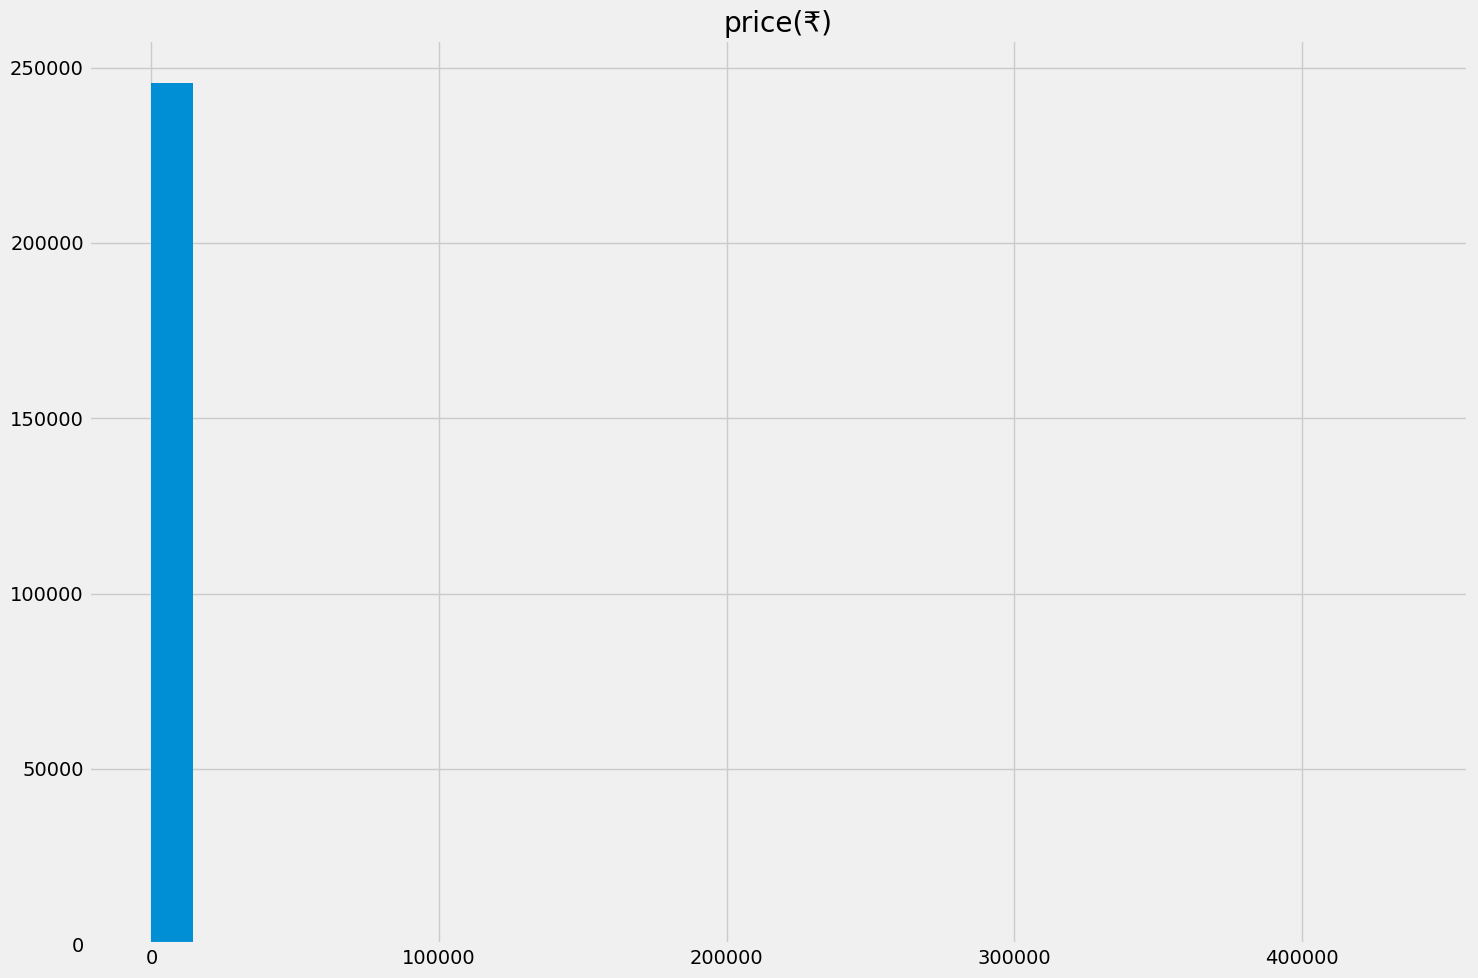

In [ ]:
# Distribusi fitur numerik
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
#import ydata profiling
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c1f3ebc15efeec27d3904e5b5ba455e3fa9ee30eabd7f956013c02730de6bc8b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

# Buat profil laporan untuk dataframe df
profile = ProfileReport(df)

# Tampilkan laporan langsung di dalam sel
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import plotly.express as px
# Initialize the initial column to be displayed
initial_column = 'manufacturer_name'
counts = dataset[initial_column].value_counts()[:11]

# Create a bar chart using Plotly
color_start = 'rgb(76, 75, 22)'
color_end = 'rgb(247, 241, 229)'
fig = px.bar(dataset, x=counts.index, y=counts.values,color=counts.values, color_continuous_scale='sunset')

fig.update_layout(
    title='Distribution of Features',
    xaxis_title='Unique Values (Top 10)',
    yaxis_title='Count',
    plot_bgcolor='white'
)
fig.update_layout(barmode='group')
columns = ['manufacturer_name','type', 'primary_comp','entire_comp', 'value','entire_value' ]
buttons = []
for column in columns:
    button = dict(
        label=column,
        method='update',
        args=[{'y': [dataset[column].value_counts()[:11].values], 'x':[dataset[column].value_counts()[:11].index], 'title':f'Counts of Unique Values in {column}' }],
        args2=[{'name': column}],
    )
    buttons.append(button)

# Add buttons to the layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True
        )
    ]
)

fig.show()

In [ ]:
# Unique values
print('Unique Values per column:')
for i in df.columns:
    print(f'{i} → {df[i].nunique()}')

Unique Values per column:
name → 241990
price(₹) → 19914
manufacturer_name → 7641
pack_size_label → 1833
short_composition1 → 8128
short_composition2 → 2863
type → 87
primary_comp → 1526
entire_comp → 2995
value → 1156
entire_value → 3633


<ipython-input-27-c702504e0f3a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




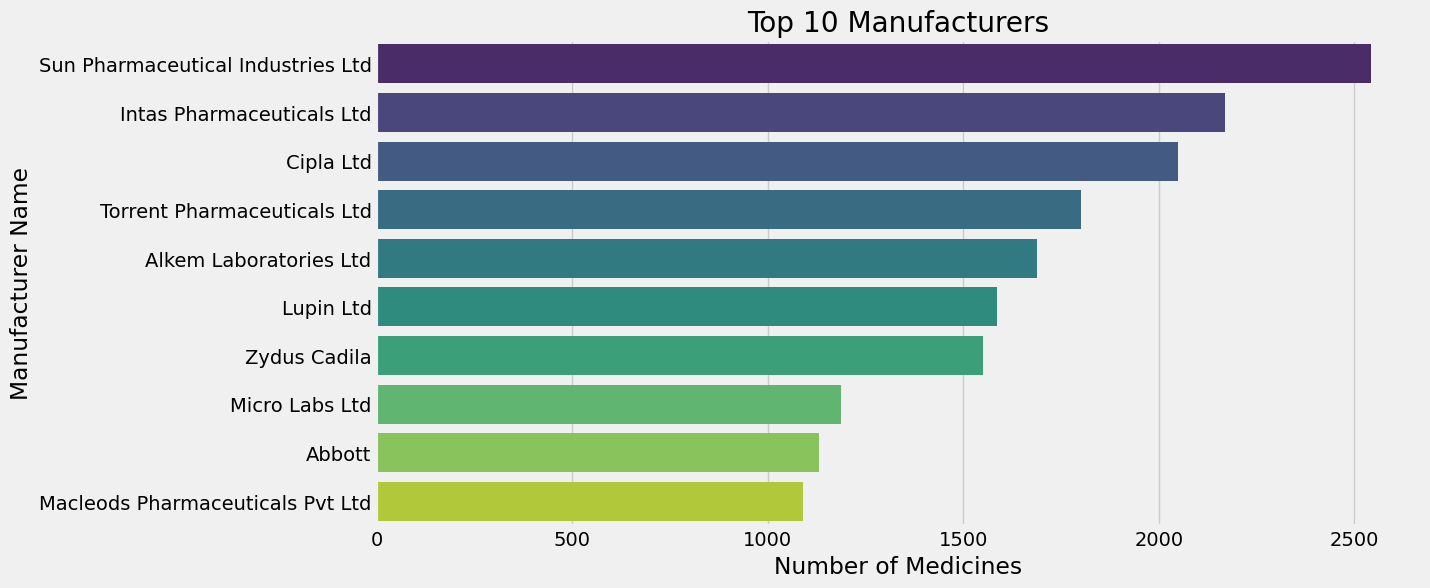

In [ ]:
# Distribution of 'manufacturer_name'
plt.figure(figsize=(12, 6))
sns.countplot(y='manufacturer_name', data=dataset, order=dataset['manufacturer_name'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Manufacturers')
plt.xlabel('Number of Medicines')
plt.ylabel('Manufacturer Name')
plt.show()

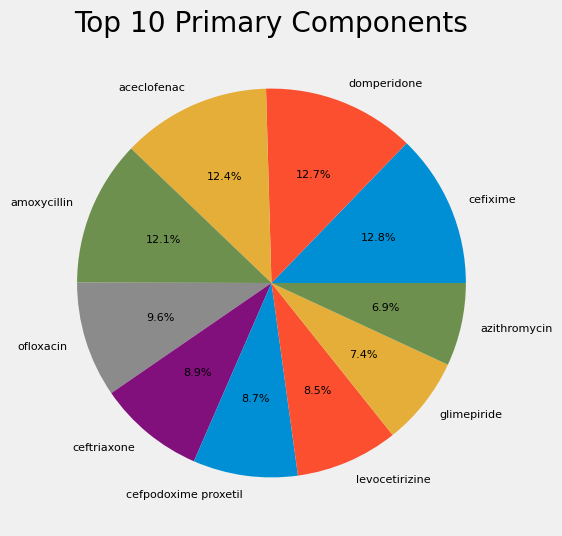

In [29]:
# Composition analysis
plt.figure(figsize=(12,6))
textprops = {"fontsize":8}
plt.pie(dataset['primary_comp'].value_counts()[:10], labels=dataset['primary_comp'].value_counts()[:10].index, autopct='%1.1f%%', textprops =textprops)
plt.title('Top 10 Primary Components')
plt.show()



**1. Distribusi Fitur Numerik:**

Histogram yang dihasilkan menunjukkan distribusi dari fitur-fitur numerik dalam dataset.  Bentuk distribusi ini penting untuk memahami sebaran data dan dapat mengindikasikan adanya *outlier* atau ketidaknormalan data.  Informasi lebih lanjut dari profil laporan (*ydata-profiling*) dapat memberikan detail lebih mendalam, termasuk statistik deskriptif, korelasi, dan missing values untuk setiap kolom.

**2. Distribusi Fitur Kategorikal (Interaktif):**

Visualisasi interaktif dengan Plotly menampilkan distribusi nilai unik dari beberapa kolom kategorikal, seperti `manufacturer_name`, `type`, `primary_comp`, `entire_comp`, `value`, dan `entire_value`.  Pengguna dapat berinteraksi dengan *dropdown* untuk memilih kolom yang ingin dilihat distribusinya.  Hal ini memungkinkan untuk melihat dengan cepat  *top 10*  nilai unik dan frekuensinya dalam setiap kolom.  Visualisasi ini memberikan gambaran tentang produsen obat yang dominan, jenis sediaan obat yang paling banyak, serta komposisi utama obat.

**Poin Penting:**

* **Informasi Produsen:** Grafik batang dan *pie chart*  menunjukkan produsen obat yang mendominasi pasar dan komposisi utama obat. Informasi ini bisa digunakan untuk analisis pasar, strategi pemasaran, atau penelitian lebih lanjut.
* **Jenis dan Komposisi Obat:** Visualisasi menunjukkan jenis sediaan obat (tablet, kapsul, dll) dan komposisi utamanya.  Informasi ini penting untuk memahami tren dalam formulasi obat.
* **Interaktivitas Visualisasi:**  Kemampuan berinteraksi dengan visualisasi menggunakan Plotly memungkinkan eksplorasi data yang lebih mendalam dan efisien.


**Insight:**

* **Dominasi Produsen Tertentu:**  Beberapa produsen obat memiliki pangsa pasar yang signifikan, menunjukkan dominasi mereka di industri farmasi India.
* **Jenis Sediaan Obat yang Populer:**  Jenis sediaan obat tertentu, seperti tablet atau kapsul, lebih umum dibandingkan yang lain.
* **Komposisi Obat yang Umum:**  Beberapa komposisi obat muncul lebih sering daripada yang lain, menunjukkan bahan aktif yang banyak digunakan dalam pengobatan.
* **Analisis Komposisi Lebih Lanjut:** Kolom `entire_comp` dan `entire_value` memungkinkan untuk menganalisis komposisi obat secara lebih detail, termasuk bahan tambahan.

**Kesimpulan:**

Analisis data awal ini memberikan gambaran umum tentang dataset obat-obatan di India. Visualisasi dan profil data membantu mengidentifikasi tren dan pola awal, seperti dominasi produsen tertentu, jenis dan komposisi obat yang umum. Analisis lebih lanjut dapat dilakukan untuk menggali lebih dalam tentang hubungan antar variabel dan menghasilkan *insight* yang lebih bermakna.  Penggunaan *ydata profiling* sangat membantu untuk eksplorasi data awal secara mendalam dan efisien.  Visualisasi interaktif menggunakan Plotly memudahkan untuk menjelajahi data kategorikal.
